# Практическая работа 2. Источники данных. Извлечение данных 
# упр1 Вариант 12

ФИО: Аросев Максим Георгиевич
Группа: БД-231м

## Задание 2.2.  Выполнить парсинг веб-страниц с помощью Beautiful Soup и Pandas открытых источников данных

Для моего варианта на сайте по ссылке https://www.moex.com/msn/etf не было найденно данных для парсинга, была взята ссылка из другого варианта https://smart-lab.ru/q/bonds/

### Парсинг

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://smart-lab.ru/q/bonds/order_by_val_to_day/desc/page1/'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
print(response)

<Response [200]>


In [5]:
print(f"Content type: \n\t {response.headers['content-type']}")

Content type: 
	 text/html; charset=utf-8


In [6]:
from bs4 import BeautifulSoup as bso

In [7]:
mysoup = bso(response.text, 'html.parser')

In [8]:
print(mysoup.prettify()[:1000])

<!DOCTYPE html>
<html lang="ru">
 <head>
  <title>
   котировки корпоративных облигаций, Московская биржа
  </title>
  <meta charset="utf-8"/>
  <meta content="telephone=no" name="format-detection"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short-Bold.woff2" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff" rel="preload"/>
  <link as="font" href="/templates/skin/smart-lab-2023/fonts/Tahoma-short.woff2" rel="preload"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://smart-lab.ru/q/bonds/" rel="canonical"/>
  <!-- Global Site Tag (gtag.js) - Google Analytics -->
  <script defer="" src="https://www.googletagmanager.com/gtag/js?id=UA-16537214-3">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
		function gtag(){dataLayer.push(arguments);}
		gtag('js',

In [9]:
print(mysoup.title)

<title>котировки корпоративных облигаций, Московская биржа</title>


In [10]:
table_html = mysoup.table.prettify()
print(table_html[:2000])

<table class="_hidden">
 <tbody>
  <tr>
   <th class="trades-table__n">
    №
   </th>
   <th class="trades-table__name trades-table__name--center">
    <a href="/q/bonds/order_by_short_name/asc/">
     Имя
    </a>
   </th>
   <th class="trades-table__chartrow chartrow">
   </th>
   <th>
    <a href="/q/bonds/order_by_mat_years/desc/">
     Лет до
     <br/>
     погаш.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_yield/desc/" title="Доходность облигации к погашению при текущей рыночной цене">
     Доходн
    </a>
   </th>
   <th title="Доходность годового купона относительно номинала">
    <a href="/q/bonds/order_by_year_yield/desc/">
     Год.куп.
     <br/>
     дох.
    </a>
   </th>
   <th title="Доходность купона относительно текущей рыночной цены облигации">
    <a href="/q/bonds/order_by_yield_last/desc/">
     Куп.дох.
     <br/>
     посл.
    </a>
   </th>
   <th>
    <a href="/q/bonds/order_by_sm_rating/desc/">
     Рейтинг
    </a>
   </th>
   <th class="trade

In [11]:
columns = []  # Список для хранения заголовков столбцов
data = []     # Список для хранения данных строк

# Извлекаем заголовки столбцов из тегов <th> в таблице
for th in mysoup.table.find_all('th'):
    columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

# Извлекаем данные из строк таблицы из тегов <tr> и <td>
for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
    row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
    data.append(row)  # Добавляем список данных строки в общий список данных

# Создаем DataFrame, используя заголовки столбцов и данные строк
df = pd.DataFrame(data, columns=columns)

# Выводим первые строки DataFrame
df.head()

,№,Имя,,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта,,
0,1,ЧТПЗЗО2024,,0.4,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t4.5%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.5%\n\t\t\t\t...,-,356.0,22.5,2,327.6,0.43,99.85,19.09.24,11.01.24,19.09.24,-,+,+
1,2,ГазпромКP4,,3.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.2%\n\t\t\t\...,\n\t\t\t\t\t\t\t5.9%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t7.3%\n\t\t\t\t...,AAA,320.9,29.42,2,22.8,2.78,80.66,28.05.24,02.06.20,25.05.27,-,+,+
2,3,Сбер Sb42R,,0.9,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.1%\n\t\t\t\...,\n\t\t\t\t\t\t\t8.8%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t9.2%\n\t\t\t\t...,AAA,209.3,43.88,2,10.9,0.85,95.40,01.09.24,03.02.23,02.03.25,-,+,+
3,4,Росагрл1Р3,,2.4,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.6%\n\t\t\t\...,\n\t\t\t\t\t\t\t8.4%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t9.7%\n\t\t\t\t...,AA-,151.7,42.13,2,6.5,2.21,87.10,18.09.24,22.09.21,16.09.26,-,+,+
4,5,Автодор6Р3,,0.6,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.2%\n\t\t\t\...,\n\t\t\t\t\t\t\t14.7%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.7%\n\t\t\t\...,AA,150.0,31.52,5,27.5,0.54,100.10,27.04.24,10.11.23,08.11.24,27.04.24,+,+


Данные взяты только с первой страницы, это указано в ссылке. Создадим цыкл, который поочередно спарсит все таблицы с 1 по 18

In [13]:
for i in range(1, 19):
    url = f'https://smart-lab.ru/q/bonds/order_by_val_to_day/desc/page{i}/'
    response = requests.get(url)
    if response.status_code == 200:
        soup = bso(response.content, 'html.parser')
        mysoup = bso(response.text, 'html.parser')
        columns = []  # Список для хранения заголовков столбцов
        data = []     # Список для хранения данных строк

        # Извлекаем заголовки столбцов из тегов <th> в таблице
        for th in mysoup.table.find_all('th'):
            columns.append(th.text)  # Добавляем текст из тега <th> в список заголовков

        # Извлекаем данные из строк таблицы из тегов <tr> и <td>
        for tr in mysoup.table.find_all('tr')[1:]:  # Начинаем с 1, чтобы пропустить первую строку с заголовками
            row = [td.text for td in tr.find_all('td')]  # Создаем список данных для каждой строки таблицы
            data.append(row)  # Добавляем список данных строки в общий список данных

        # Создаем DataFrame, используя заголовки столбцов и данные строк
        if i == 1:
            df = pd.DataFrame(data, columns=columns)
        else:
            df = pd.concat([df, pd.DataFrame(data, columns=columns)])


In [14]:
# Выводим первые строки DataFrame
df.head()

,№,Имя,,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта,,
0,1,ЧТПЗЗО2024,,0.4,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.8%\n\t\t\t\t...,\n\t\t\t\t\t\t\t4.5%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t4.5%\n\t\t\t\t...,-,356.0,22.5,2,327.6,0.43,99.85,19.09.24,11.01.24,19.09.24,-,+,+
1,2,ГазпромКP4,,3.1,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.2%\n\t\t\t\...,\n\t\t\t\t\t\t\t5.9%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t7.3%\n\t\t\t\t...,AAA,320.9,29.42,2,22.8,2.78,80.66,28.05.24,02.06.20,25.05.27,-,+,+
2,3,Сбер Sb42R,,0.9,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.1%\n\t\t\t\...,\n\t\t\t\t\t\t\t8.8%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t9.2%\n\t\t\t\t...,AAA,209.3,43.88,2,10.9,0.85,95.40,01.09.24,03.02.23,02.03.25,-,+,+
3,4,Росагрл1Р3,,2.4,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.6%\n\t\t\t\...,\n\t\t\t\t\t\t\t8.4%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t9.7%\n\t\t\t\t...,AA-,151.7,42.13,2,6.5,2.21,87.10,18.09.24,22.09.21,16.09.26,-,+,+
4,5,Автодор6Р3,,0.6,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t15.2%\n\t\t\t\...,\n\t\t\t\t\t\t\t14.7%\n\t\t\t\t\t\t,\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t14.7%\n\t\t\t\...,AA,150.0,31.52,5,27.5,0.54,100.10,27.04.24,10.11.23,08.11.24,27.04.24,+,+


### Обработка данных

Необходимо преобразовать датафрейм. В первую очередь надо вычленить корректные проценты из столбцов "Доходн";  "Год.куп.дох."; "Куп.дох.посп.". Также необходимо преобразовать типы данных и удалить последние 2 столбца, так как они не представляют никакой ценности и являются техническими

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 72
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   №                  1773 non-null   object
 1   Имя                1773 non-null   object
 2                      1773 non-null   object
 3   Лет допогаш.       1773 non-null   object
 4   Доходн             1773 non-null   object
 5   Год.куп.дох.       1773 non-null   object
 6   Куп.дох.посл.      1773 non-null   object
 7   Рейтинг            1773 non-null   object
 8   Объем, млн руб     1773 non-null   object
 9   Купон, руб         1773 non-null   object
 10  Частота,раз в год  1773 non-null   object
 11  НКД, руб           1773 non-null   object
 12  Дюр-я, лет         1773 non-null   object
 13  Цена               1773 non-null   object
 14  Дата купона        1773 non-null   object
 15  Размещение         1773 non-null   object
 16  Погашение          1773 non-null   object
 1

In [16]:
df.shape

(1773, 20)

In [17]:
df = df.drop(columns = df.columns[-2:])

In [18]:
df.columns

Index(['№', 'Имя', 'Лет допогаш.', 'Доходн', 'Год.куп.дох.', 'Куп.дох.посл.',
       'Рейтинг', 'Объем, млн руб', 'Купон, руб', 'Частота,раз в год',
       'НКД, руб', 'Дюр-я, лет', 'Цена', 'Дата купона', 'Размещение',
       'Погашение', 'Оферта'],
      dtype='object')

In [19]:
import re

def percent_preproc(x):
    return pd.to_numeric(re.search( r"\d+\.\d+", x)[0], errors = 'coerce')

In [20]:
df = df.drop(columns = df.columns[:1])

In [21]:
#В столбце 'Куп.дох.посл.' попадаются прочерки, заменим их на 0.0, чтобы все корректно отработало дальше
df['Куп.дох.посл.'] = df['Куп.дох.посл.'].str.replace('-','0.0')
df['Доходн'] = df['Доходн'].str.replace('-','0.0')
df['Год.куп.дох.'] = df['Год.куп.дох.'].str.replace('-','0.0')

In [22]:
df['Лет допогаш.'] = pd.to_numeric(df['Лет допогаш.'], errors = 'coerce')
df['Объем, млн руб'] = pd.to_numeric(df['Объем, млн руб'], errors = 'coerce')
df['Купон, руб'] = pd.to_numeric(df['Купон, руб'], errors = 'coerce')
df['НКД, руб'] = pd.to_numeric(df['НКД, руб'], errors = 'coerce')
df['Дюр-я, лет'] = pd.to_numeric(df['Дюр-я, лет'], errors = 'coerce')
df['Цена'] = pd.to_numeric(df['Цена'], errors = 'coerce')
df['Частота,раз в год'] = pd.to_numeric(df['Частота,раз в год'], errors = 'coerce')
df['Дата купона'] = pd.to_datetime(df['Дата купона'], errors = 'coerce')
df['Размещение'] = pd.to_datetime(df['Размещение'], errors = 'coerce')
df['Погашение'] = pd.to_datetime(df['Погашение'], errors = 'coerce')
df['Доходн'] = df['Доходн'].apply(percent_preproc)
df['Год.куп.дох.'] = df['Год.куп.дох.'].apply(percent_preproc) 
df['Куп.дох.посл.'] = df['Куп.дох.посл.'].apply(percent_preproc)

In [23]:
df

,Имя,Лет допогаш.,Доходн,Год.куп.дох.,Куп.дох.посл.,Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет",Цена,Дата купона,Размещение,Погашение,Оферта
0,ЧТПЗЗО2024,0.4,4.8,4.5,4.5,-,356.0,22.50,2.0,327.6,0.43,99.85,2024-09-19,2024-11-01,2024-09-19,-
1,ГазпромКP4,3.1,14.2,5.9,7.3,AAA,320.9,29.42,2.0,22.8,2.78,80.66,2024-05-28,2020-02-06,2027-05-25,-
2,Сбер Sb42R,0.9,15.1,8.8,9.2,AAA,209.3,43.88,2.0,10.9,0.85,95.40,2024-01-09,2023-03-02,2025-02-03,-
3,Росагрл1Р3,2.4,15.6,8.4,9.7,AA-,151.7,42.13,2.0,6.5,2.21,87.10,2024-09-18,2021-09-22,2026-09-16,-
4,Автодор6Р3,0.6,15.2,14.7,14.7,AA,150.0,31.52,5.0,27.5,0.54,100.10,2024-04-27,2023-10-11,2024-08-11,27.04.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,BCS08/24,0.3,0.0,0.0,0.0,A,NaN,0.00,0.0,NaN,NaN,NaN,NaT,2021-07-14,2024-02-08,-
69,BCS12/26-2,2.7,0.0,0.0,0.0,A,NaN,0.00,2.0,NaN,NaN,NaN,2024-01-07,2021-09-21,2026-12-30,-
70,BCS11/24-8,0.6,0.0,0.0,0.0,A,NaN,10.03,1.0,NaN,NaN,NaN,2024-11-29,2021-11-29,2024-11-29,-
71,BCS06/25-A,1.1,0.0,0.0,0.0,A,NaN,0.00,1.0,NaN,NaN,NaN,2024-01-12,2021-01-12,2025-01-06,-


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 72
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Имя                1773 non-null   object        
 1   Лет допогаш.       1773 non-null   float64       
 2   Доходн             1773 non-null   float64       
 3   Год.куп.дох.       1773 non-null   float64       
 4   Куп.дох.посл.      1773 non-null   float64       
 5   Рейтинг            1773 non-null   object        
 6   Объем, млн руб     1108 non-null   float64       
 7   Купон, руб         1773 non-null   float64       
 8   Частота,раз в год  1773 non-null   float64       
 9   НКД, руб           1292 non-null   float64       
 10  Дюр-я, лет         1030 non-null   float64       
 11  Цена               1461 non-null   float64       
 12  Дата купона        1768 non-null   datetime64[ns]
 13  Размещение         1773 non-null   datetime64[ns]
 14  Погашение 

Переназовем столбцы, чтобы было понятно где измерение идетв процентах

In [25]:
df.rename(
    columns = {
        "Доходн": "Доходность, %",
        "Год.куп.дох.": "Год.куп.дох., %",
        "Куп.дох.посл.": "Куп.дох.посл., %",
        "Цена": "Цена, руб."
    },
    inplace = True
)

In [26]:
df.head()

,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
0,ЧТПЗЗО2024,0.4,4.8,4.5,4.5,-,356.0,22.50,2.0,327.6,0.43,99.85,2024-09-19,2024-11-01,2024-09-19,-
1,ГазпромКP4,3.1,14.2,5.9,7.3,AAA,320.9,29.42,2.0,22.8,2.78,80.66,2024-05-28,2020-02-06,2027-05-25,-
2,Сбер Sb42R,0.9,15.1,8.8,9.2,AAA,209.3,43.88,2.0,10.9,0.85,95.40,2024-01-09,2023-03-02,2025-02-03,-
3,Росагрл1Р3,2.4,15.6,8.4,9.7,AA-,151.7,42.13,2.0,6.5,2.21,87.10,2024-09-18,2021-09-22,2026-09-16,-
4,Автодор6Р3,0.6,15.2,14.7,14.7,AA,150.0,31.52,5.0,27.5,0.54,100.10,2024-04-27,2023-10-11,2024-08-11,27.04.24


**Результат:** Данные об котировках облигаций были получены парсингом страницы сайта и обработаны с последующем формированием чистого датасета, удобного для анализа

### Анализ данных

В качестве верхнеуровневой аналитики посмотрим рапределение облигаций по доходности, выведем топ 5 облигаций с самой высокой доходностью, а также посмотрим распределение облигаций по рейтингу

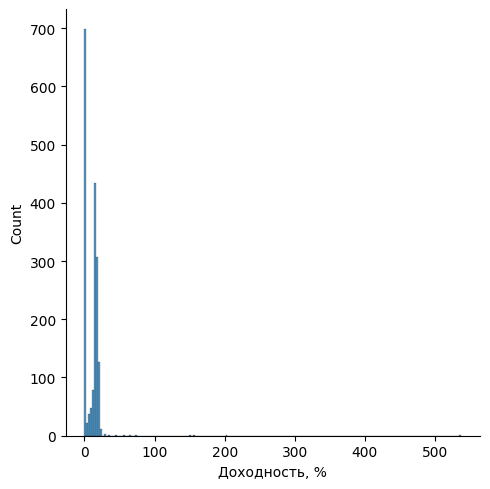

In [27]:
sns.displot(df['Доходность, %'])

Посмотрим на диапазон 0 до 40 детальнее

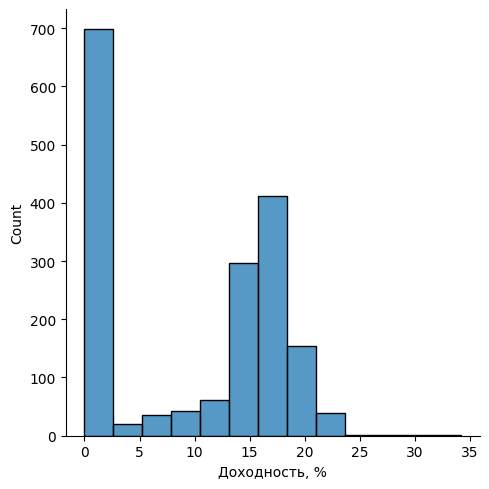

In [28]:
sns.displot(df[df['Доходность, %'] <= 40]['Доходность, %'])

**Результат:** Наибольшее кол-во акций с нулевой доходностью, далее пик находится на значении 15 %. Получается, что при использовании облигаций в качестве пассивного дохода можно расчитывать на 15% доходности. В данный момент времени такая ставка находится на уровне процентной ставки банков

In [29]:
print("Топ 5 облигаций с самой высокой доходностью")
df.sort_values(by = "Доходность, %", ascending = False).head(5)

Топ 5 облигаций с самой высокой доходностью


,Имя,Лет допогаш.,"Доходность, %","Год.куп.дох., %","Куп.дох.посл., %",Рейтинг,"Объем, млн руб","Купон, руб","Частота,раз в год","НКД, руб","Дюр-я, лет","Цена, руб.",Дата купона,Размещение,Погашение,Оферта
34,Титан-3 01,29.4,537.5,7.4,8.1,B+,0.3,3.37,4.0,3.0,0.03,91.99,2024-04-28,2021-03-03,2053-07-28,-
21,РуСол клА,6.9,201.3,12.8,13.8,BBB+,0.0,21.16,4.0,14.6,0.08,92.61,2024-05-15,2020-12-02,2031-02-15,-
59,РуСол клБ,6.9,156.1,16.8,17.8,BBB+,0.3,29.79,4.0,20.5,0.08,94.04,2024-05-15,2020-12-02,2031-02-15,-
20,ВТБ Б1-186,0.0,149.9,0.0,0.0,AAA,NaN,0.00,37.0,NaN,0.01,99.25,2024-04-20,2021-04-14,2024-04-20,-
1,ДОМ.РФ Б-6,26.7,71.8,7.9,8.1,AAA,0.1,19.82,4.0,16.8,0.04,98.21,2024-01-05,2017-08-11,2050-07-11,03.05.24


**Пояснение:**

от ААА до BBB - инвестиционный рейтинг;

от BB до B спекулятивный;

ССС и ниже - преддефолтное состояние;

Брать облигации с рейтингом ниже BBB - очень высокий риск купить долги будущего банкрота.
Получается, что аномально большая доходность сопряжена с высоким риском потерять свои вложения

Посмотрим, распределение облигаций по рейтингу

In [30]:
df1 = df.pivot_table(index='Рейтинг', values='Имя', aggfunc='count').sort_values(by='Имя', ascending=False)

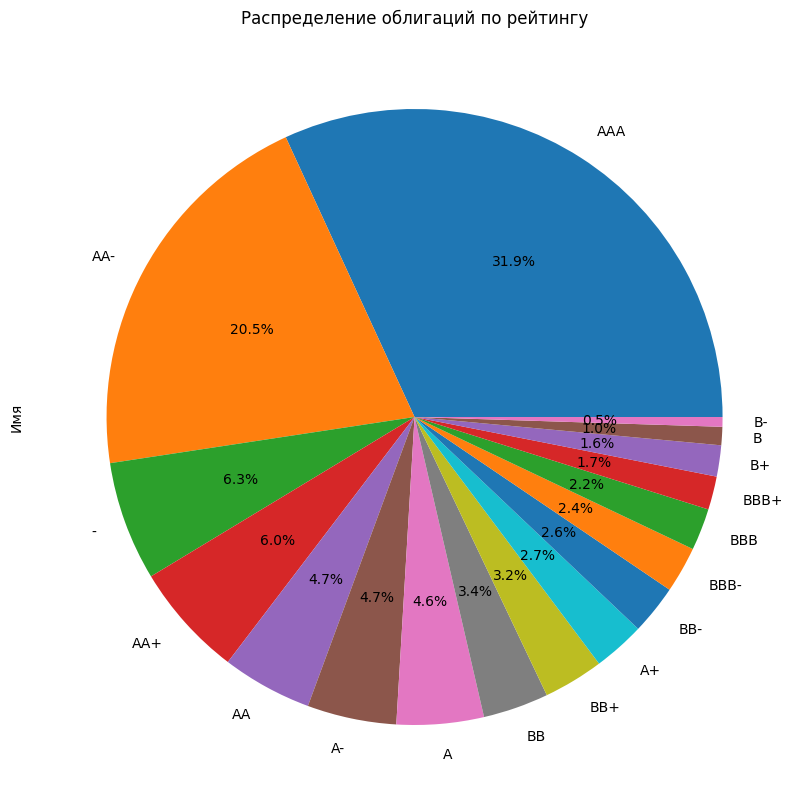

In [31]:
plt.rcParams["figure.figsize"] = [20, 10]
df1.plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')
plt.title('Распределение облигаций по рейтингу')
plt.show()

**Вывод:**

Самые распространенные классы облигаций ААА АА- АА+ АА. Эти облигации являются достаточно безопасными. Поэтому облигации можно считать самым надежным финансовым инструментов. Такая надежность сопровождается доходностью в основном на уровне банковской процентной ставки, высокоходные облигации в оснвном сопряжены с высоким риском дефолта.

Архитектура решешия
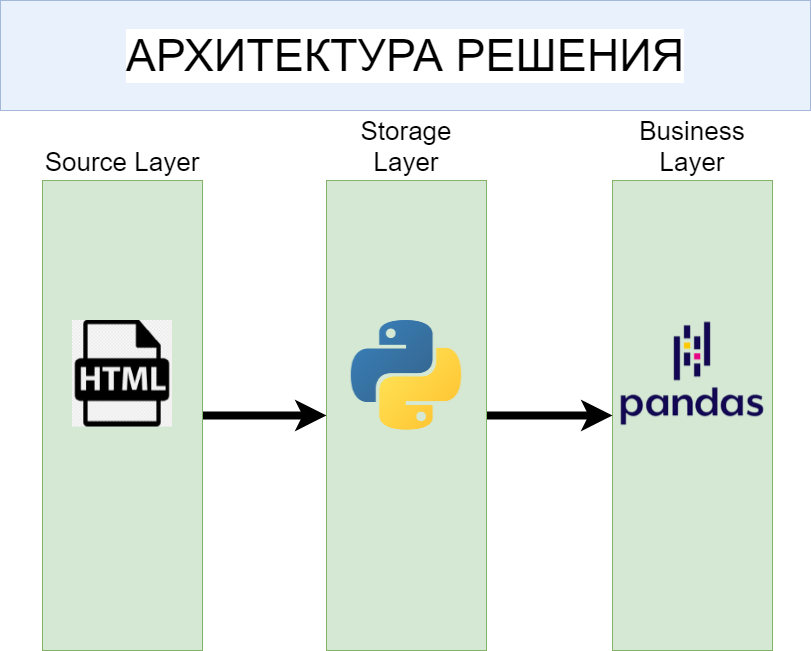